In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

# Configuration
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

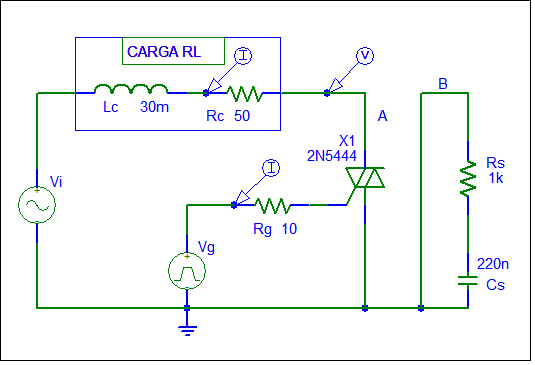

In [2]:
display(Image("cir1.png"))

# Controle de fase

## Simulação sem o circuito snubber

Circuito em ngspice:

In [3]:
! cat netlist.cir

* NETLIST
vi vp 0 dc 0 SIN(0 179.61 50)
lc vp v1n 30m
v1 v1p v1n DC 0
rc v1p va 50

x1 va g 0 2n5568
vg 0 v2n PULSE(0 5 2.5m 1u 1u 300u 10m)
v2 v2p v2n DC 0
rg v2p g 10

* rs 0 s 1k
* cs 0 s 220n


In [112]:
va = np.genfromtxt('data/01-va.csv')
vc = np.genfromtxt('data/01-vc.csv')
vg = np.genfromtxt('data/01-vg.csv')
ia = np.genfromtxt('data/01-ia.csv')
ig = np.genfromtxt('data/01-ig.csv')

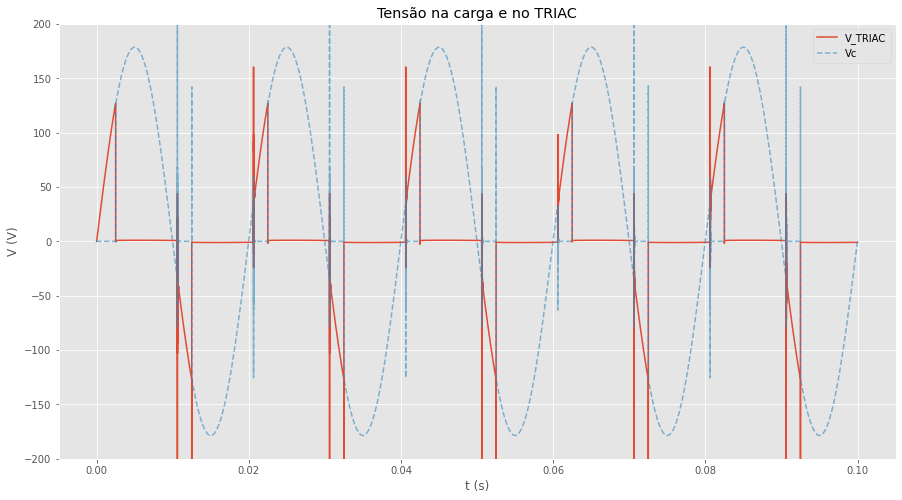

In [113]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(va[:,0], va[:,1])
ax1.plot(vc[:,0], vc[:,1], '--', alpha=0.6)
ax1.set_title("Tensão na carga e no TRIAC")
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['V_TRIAC', 'Vc' ])
ax1.set_ylim([-200, 200])
plt.show()

Na figura acima - em que estão simuladas a tensão na carga e a tensão sobre o triac - é possível notar picos de tensão imediatamente após o desligamento do TRIAC, fenômeno a ser analisado neste item.

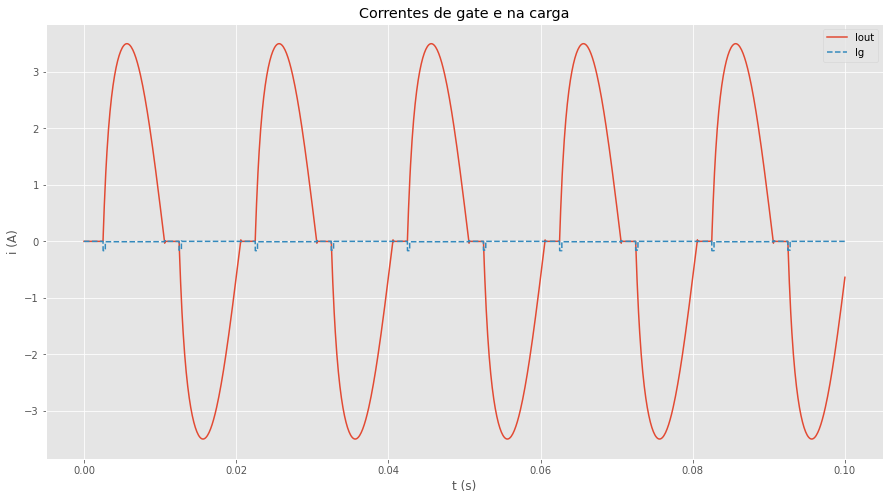

In [114]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ia[:,0], ia[:,1], '-')
ax1.plot(ig[:,0], ig[:,1], '--')
ax1.set_title("Correntes de gate e na carga")
ax1.set_ylabel("i (A)")
ax1.set_xlabel("t (s)")
ax1.legend(['Iout', 'Ig'])
plt.show()

Esses picos de tensão se dão porque, no momento de desligamento, o TRIAC possui uma resistência elevada. No caso da carga RL, quando isso acontece, ainda existe corrente na carga, desta forma, a elevação de resistência acarreta em um pico de tensão, que pode ser observado acima, no primeiro gráfico. A corrente pode ser observada no gráfico imediatamente acima.

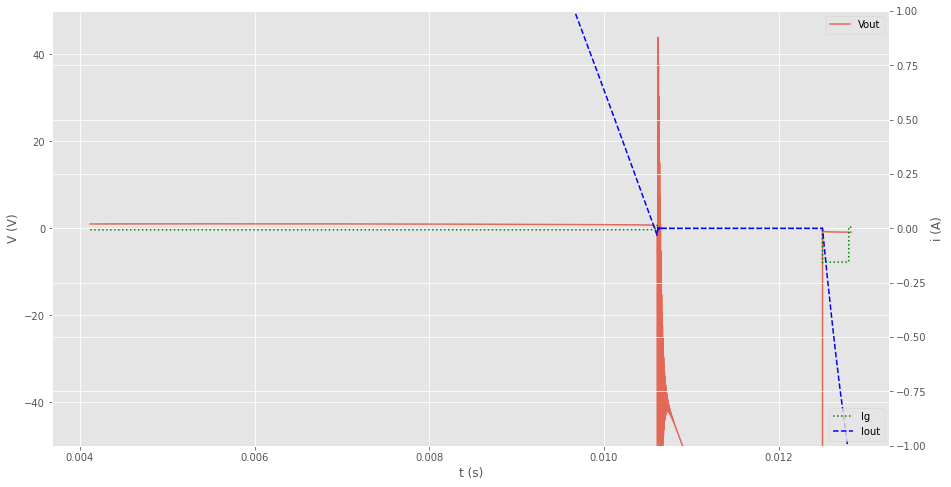

In [129]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(va[200:900,0], va[200:900,1], alpha=0.8)
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vout'])
ax1.set_ylim((-50,50))
ax1.legend(['Vout'])

ax2 = ax1.twinx()
ax2.plot(ig[200:900,0], ig[200:900,1], ':g')
ax2.plot(ia[200:900,0], ia[200:900,1], '--b')
ax2.set_ylabel("i (A)")
ax2.legend(['Ig','Iout'], loc='lower right')
ax2.set_ylim((-1,1))
plt.show()

Não foi possível medir o valor de I_H (no gráfico a corrente é desprezível no momento em que o TRIAC desliga, provavelmente a corrente I_H é menor que 1mA), provavelmente por conta de uma implementação do modelo que é diferente do modelo do Pspice (na imagem, o I_H parece ser zero, mas sabemos que isso não pode acontecer). O modelo utilizado foi do TRIAC 2N5568 que pode ser encontrado aqui: https://www.powerelectronicsnews.com/power-supply-design-note-simulating-a-triac/

## Simulação com o circuito snubber

Circuito em ngspice:

In [8]:
!cat netlist2.cir

* NETLIST
vi vp 0 dc 0 SIN(0 179.61 50)
lc vp v1n 30m
v1 v1p v1n DC 0
rc v1p va 50

x1 va g 0 2n5568
vg 0 v2n PULSE(0 5 2.5m 1u 1u 300u 10m)
v2 v2p v2n DC 0
rg v2p g 10

rs va s 1k
cs 0 s 220n


In [96]:
va = np.genfromtxt('data/02-va.csv')
vc = np.genfromtxt('data/02-vc.csv')
vg = np.genfromtxt('data/02-vg.csv')
ia = np.genfromtxt('data/02-ia.csv')
ig = np.genfromtxt('data/02-ig.csv')

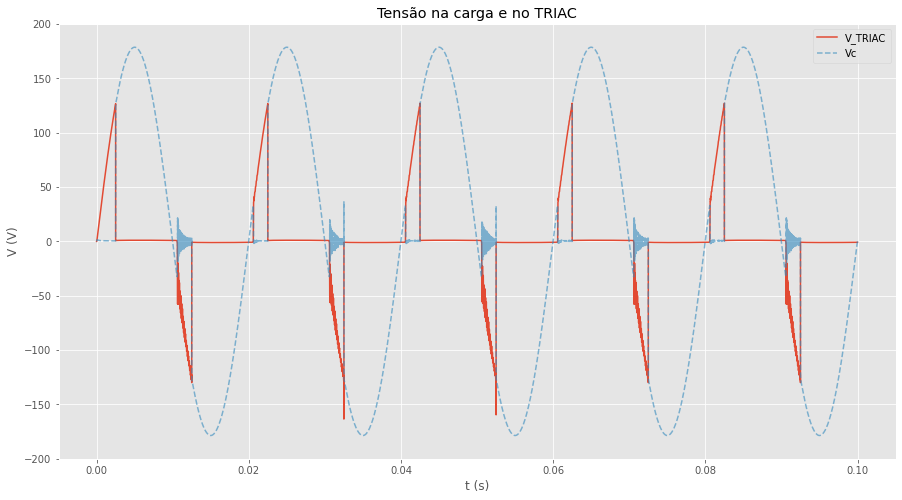

In [99]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(va[:,0], va[:,1])
ax1.plot(vc[:,0], vc[:,1], '--', alpha=0.6)
ax1.set_title("Tensão na carga e no TRIAC")
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['V_TRIAC', 'Vc' ])
ax1.set_ylim([-200, 200])
plt.show()

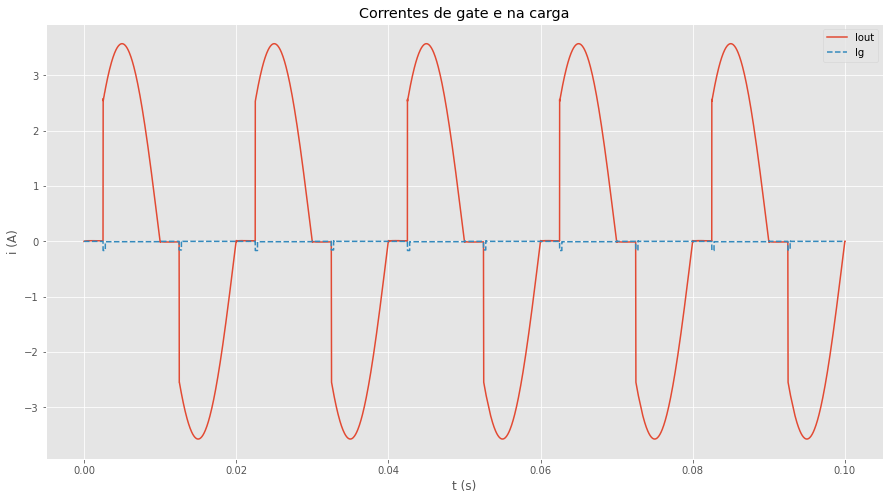

In [103]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ia[:,0], ia[:,1], '-')
ax1.plot(ig[:,0], ig[:,1], '--')
ax1.set_title("Correntes de gate e na carga")
ax1.set_ylabel("i (A)")
ax1.set_xlabel("t (s)")
ax1.legend(['Iout', 'Ig'])
plt.show()

Aqui podemos perceber que, ao adicionar o circuito snubber, estamos na verdade criando um outro caminho para a corrente que passa pela carga (Rs, Cs). Desta forma, no momento de desligamento do TRIAC, a resistência passa a ser uma composição do TRIAC e de Rs (conectadas em série), o que consequentemente diminui significativamente a tensão, eliminando os picos no gráfico de tensão.

## Alteração L=30uH

Circuito em ngspice:

In [12]:
!cat netlist3.cir

* NETLIST
vi vp 0 dc 0 SIN(0 179.61 50)
lc vp v1n 30u
v1 v1p v1n DC 0
rc v1p va 50

x1 va g 0 2n5568
vg 0 v2n PULSE(0 5 2.5m 1u 1u 300u 10m)
v2 v2p v2n DC 0
rg v2p g 10

rs va s 1k
cs 0 s 220n


In [100]:
va = np.genfromtxt('data/03-va.csv')
vc = np.genfromtxt('data/03-vc.csv')
vg = np.genfromtxt('data/03-vg.csv')
ia = np.genfromtxt('data/03-ia.csv')
ig = np.genfromtxt('data/03-ig.csv')

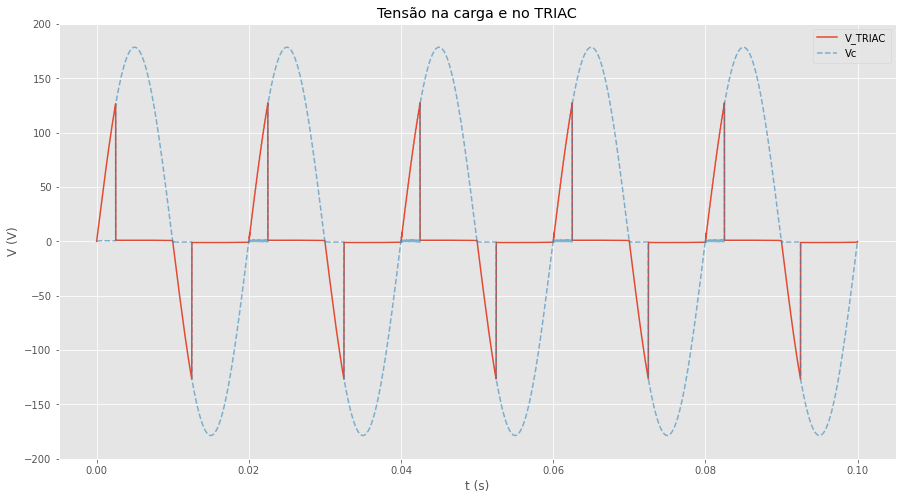

In [101]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(va[:,0], va[:,1])
ax1.plot(vc[:,0], vc[:,1], '--', alpha=0.6)
ax1.set_title("Tensão na carga e no TRIAC")
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['V_TRIAC', 'Vc' ])
ax1.set_ylim([-200, 200])
plt.show()

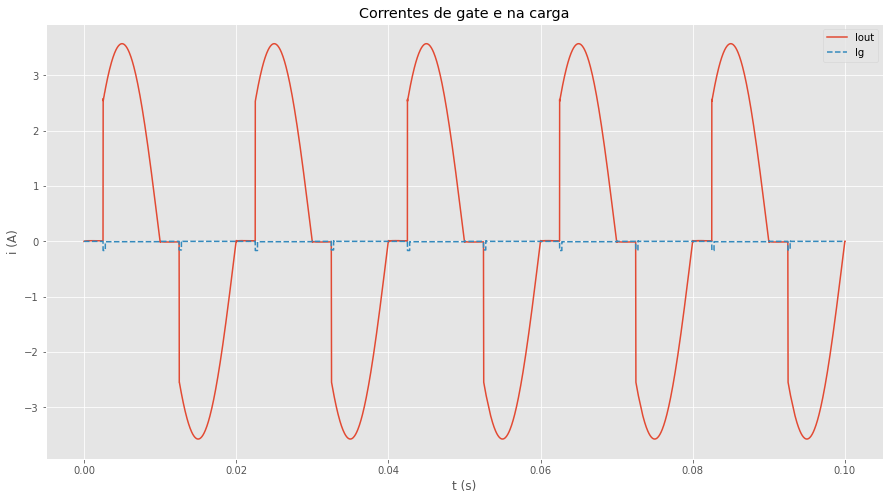

In [102]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ia[:,0], ia[:,1], '-')
ax1.plot(ig[:,0], ig[:,1], '--')
ax1.set_title("Correntes de gate e na carga")
ax1.set_ylabel("i (A)")
ax1.set_xlabel("t (s)")
ax1.legend(['Iout', 'Ig'])
plt.show()

Podemos perceber pelo gráfico acima que a indutância de 30uH praticamente elimina o atraso da corrente se comparada com o item anterior (30mH), mostrando que a indutância é desprzível para a carga resistiva utilizada.

## Fator de potência visto pela fonte

O fator de potência foi calculado da seguinte maneira no ngspice:
```
meas tran vi_rms rms vp
meas tran ii_rms rms i(vi)

let p_v = vp*(-i(vi))
let s = vi_rms * ii_rms
meas tran p_med avg p_v
print s
let pf = p_med/s
print pf
```
Obtendo o seguinte resultado:

In [16]:
! sed '/^vi_rms              =  1.27004e+02 from=  5.00000e-07 to=  1.00000e-01$/,\
/G\
/!d;//d' data/03.out

ii_rms              =  2.40424e+00 from=  5.00000e-07 to=  1.00000e-01
p_med               =  2.912152e+02 from=  0.000000e+00 to=  1.000000e-01
s = 3.0535e+02
pf = 9.5372e-01
vr_rms              =  1.20212e+02 from=  5.00000e-07 to=  1.00000e-01


Assim, temos um fator de potência:

$$\text{FP} = 0.9537$$

O fator de potência é bastante elevado, mostrando que de fato a componente indutiva na impedância da carga para L=30uH é desprezível.

## Análise por transformada de fourier

In [17]:
! sed '/^No. of Data Rows : 2728$/,\
/^vi_rms              =  1.27004e+02 from=  5.00000e-07 to=  1.00000e-01$\
/!d;//d' data/03.out

Fourier analysis for vr(vp):
  No. Harmonics: 10, THD: 0.000239753 %, Gridsize: 200, Interpolation Degree: 1

Harmonic Frequency   Magnitude   Phase       Norm. Mag   Norm. Phase
-------- ---------   ---------   -----       ---------   -----------
 0       0           -0.00016702 0           0           0          
 1       50          179.608     -4.8197e-05 1           0          
 2       100         0.000319571 57.9836     1.77927e-06 57.9837    
 3       150         0.000156545 -172.19     8.71593e-07 -172.19    
 4       200         0.000138842 -18.86      7.73027e-07 -18.86     
 5       250         0.000128186 128.464     7.137e-07   128.464    
 6       300         8.94208e-05 -99.514     4.97867e-07 -99.514    
 7       350         9.02958e-05 61.0468     5.02739e-07 61.0469    
 8       400         6.13902e-05 173.079     3.41801e-07 173.079    
 9       450         5.63121e-05 -23.1       3.13529e-07 -23.1      

Fourier analysis for -i(vi):
  No. Harmonics: 10, THD: 24.101

Então temos: 

$$\phi_1 = -0.00006 - (-10.13) \approx 10.13 ~^o = 0.1768 ~\text{rad}$$

Ou seja, embora a carga seja essencialmente resistiva, existe um atraso da corrente em relação à tensão.

Este fenômeno pode ser explicado porque com este ângulo de disparo (45 graus) não existe uma simetria entre quartos de ciclo (ou seja, a tensão entre 0 e 90 graus não é similar refletida em relação ao eixo y à tensão entre 90 e 180 graus). Esta assimetria causa a defasagem observada no calculo por transformada de fourier.

## Queda de tensão na resistência de carga

A tensão no resistor foi calculada da seguinte forma:
```
let vr = vr(v1p)-vr(va)
meas tran vr_rms rms vr
```
Obtendo o valor de $120.21 ~\text{V}$

Teoricamente podemos fazer o seguinte cálculo como expresso nas notas de aula:

$$Vo_{ef} = Vi \cdot \sqrt{\frac{1}{2} - \frac{\alpha}{2\pi} + \frac{\sin{2\alpha}}{4\pi}}$$

Com $\alpha = 45^o = \frac{\pi}{4} ~\text{rad}$, ou seja:

$$Vo_{ef} = 179.61 \cdot \sqrt{\frac{1}{2} - \frac{\frac{\pi}{4}}{2\pi} + \frac{\sin{\frac{\pi}{2}}}{4\pi}} = 121.10 ~\text{V}$$

Ou seja, o valor constatado empiricamente é coerente com o valor teórico calculado. A pequena diferença observada deve se dar por conta da pequena impedância (30uH) ou outras perdas incorporadas ao modelo SPICE e que não estão contidas no cálculo teórico.

# Controle de ciclos inteiros

## L=30uH

Circuito em ngspice:

In [18]:
!cat netlist4.cir

* NETLIST
vi vp 0 dc 0 SIN(0 179.61 50)
lc vp v1n 30u
v1 v1p v1n DC 0
rc v1p va 50

x1 va g 0 2n5568
vg 0 v2n PULSE(0 5 0m 1u 1u 300u 10m)
v2 v2p v2n DC 0
rg v2p g 10

rs va s 1k
cs 0 s 220n


In [106]:
va = np.genfromtxt('data/04-va.csv')
vc = np.genfromtxt('data/04-vc.csv')
vg = np.genfromtxt('data/04-vg.csv')
ia = np.genfromtxt('data/04-ia.csv')
ig = np.genfromtxt('data/04-ig.csv')

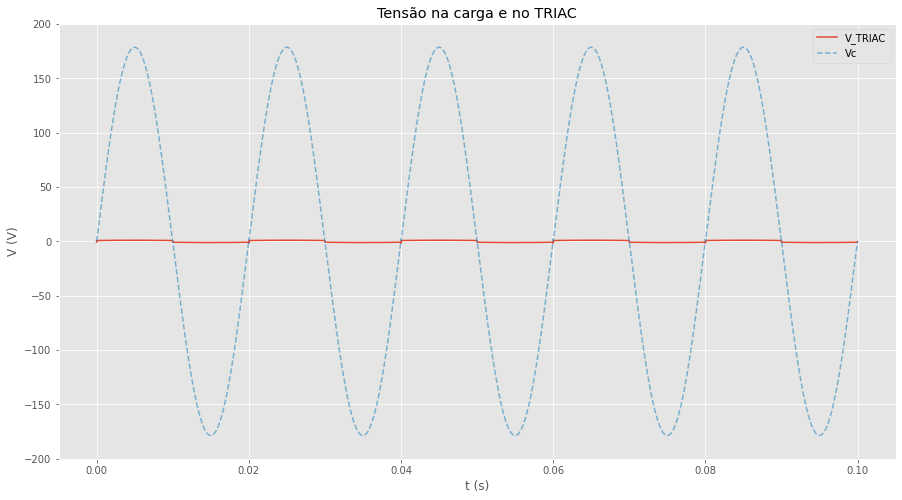

In [107]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(va[:,0], va[:,1])
ax1.plot(vc[:,0], vc[:,1], '--', alpha=0.6)
ax1.set_title("Tensão na carga e no TRIAC")
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['V_TRIAC', 'Vc' ])
ax1.set_ylim([-200, 200])
plt.show()

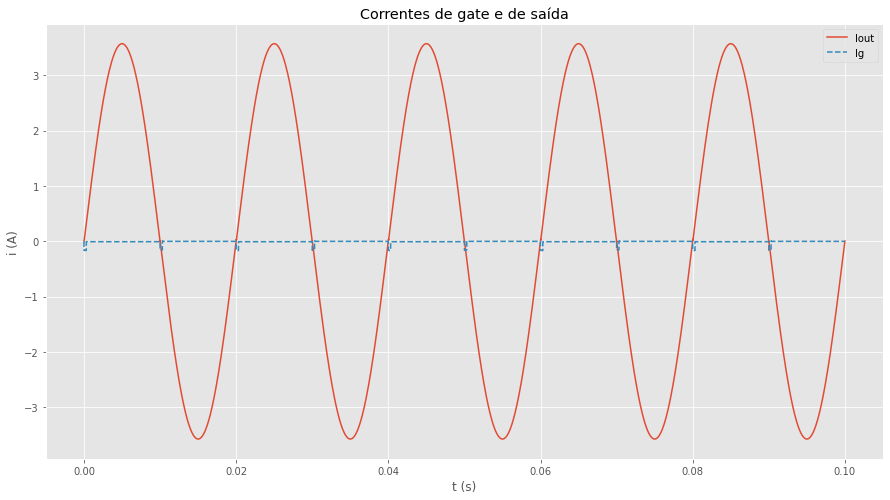

In [21]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ia[:,0], ia[:,1], '-')
ax1.plot(ig[:,0], ig[:,1], '--')
ax1.set_title("Correntes de gate e de saída")
ax1.set_ylabel("i (A)")
ax1.set_xlabel("t (s)")
ax1.legend(['Iout', 'Ig'])
plt.show()

Neste caso sempre há corrente na carga e também o TRIAC está sempre ligado: no momento em que um quarto de ciclo termina, o TRIAC desliga e liga em sequência, de forma que a tensão e corrente na carga operam como um sinal AC pleno.

## L=30mH

Circuito em ngspice:

In [22]:
!cat netlist5.cir

* NETLIST
vi vp 0 dc 0 SIN(0 179.61 50)
lc vp v1n 30m
v1 v1p v1n DC 0
rc v1p va 50

x1 va g 0 2n5568
vg 0 v2n PULSE(0 5 0m 1u 1u 300u 10m)
v2 v2p v2n DC 0
rg v2p g 10

rs va s 1k
cs 0 s 220n


In [131]:
va = np.genfromtxt('data/05-va.csv')
vc = np.genfromtxt('data/05-vc.csv')
vg = np.genfromtxt('data/05-vg.csv')
ia = np.genfromtxt('data/05-ia.csv')
ig = np.genfromtxt('data/05-ig.csv')

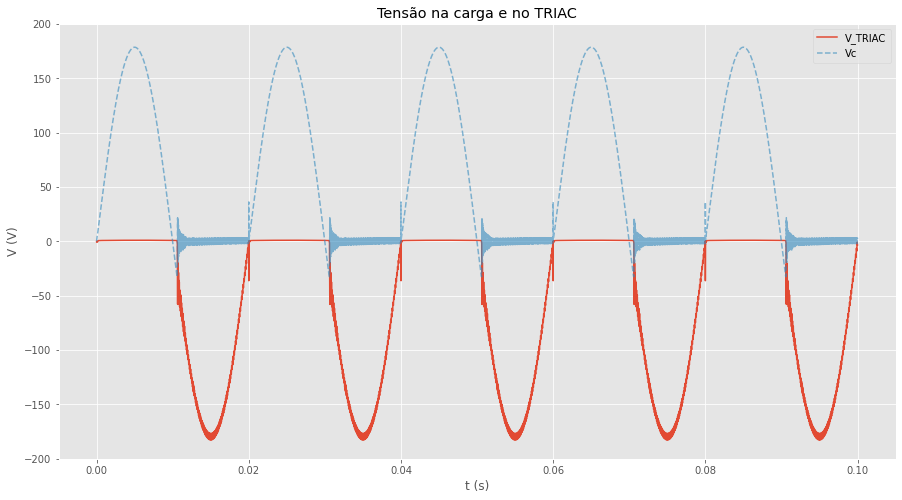

In [132]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(va[:,0], va[:,1])
ax1.plot(vc[:,0], vc[:,1], '--', alpha=0.6)
ax1.set_title("Tensão na carga e no TRIAC")
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['V_TRIAC', 'Vc' ])
ax1.set_ylim([-200, 200])
plt.show()

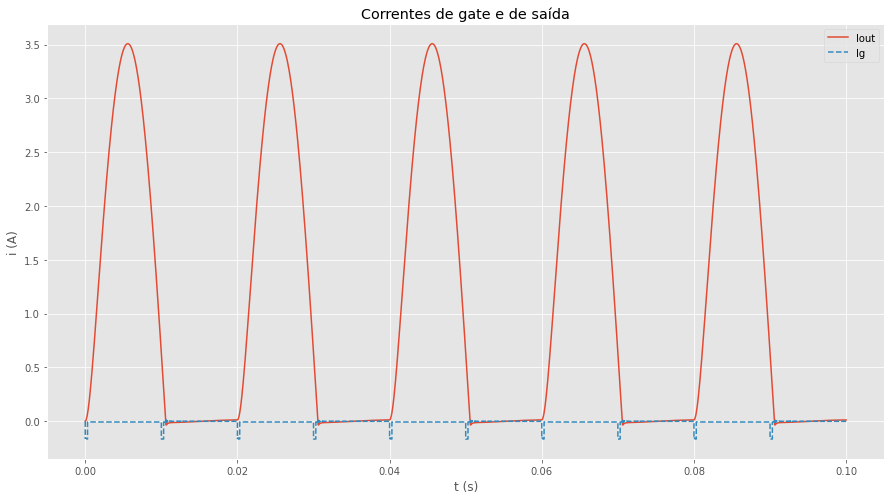

In [133]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ia[:,0], ia[:,1], '-')
ax1.plot(ig[:,0], ig[:,1], '--')
ax1.set_title("Correntes de gate e de saída")
ax1.set_ylabel("i (A)")
ax1.set_xlabel("t (s)")
ax1.legend(['Iout', 'Ig'])
plt.show()

Neste caso, com a indutância maior, o TRIAC não liga em metade dos semiciclos e portanto a tensão e corrente são nulas na carga em meio ciclo.

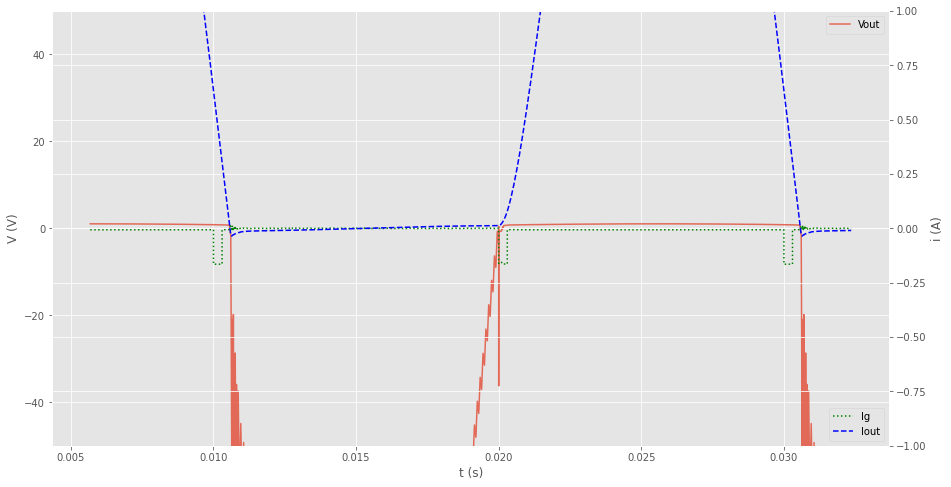

In [134]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(va[200:900,0], va[200:900,1], alpha=0.8)
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vout'])
ax1.set_ylim((-50,50))
ax1.legend(['Vout'])

ax2 = ax1.twinx()
ax2.plot(ig[200:900,0], ig[200:900,1], ':g')
ax2.plot(ia[200:900,0], ia[200:900,1], '--b')
ax2.set_ylabel("i (A)")
ax2.legend(['Ig','Iout'], loc='lower right')
ax2.set_ylim((-1,1))
plt.show()

Analogo ao fenômeno observado no primeiro item, o que acontece é que no momento em que há o segundo disparo no gate, ainda há corrente no TRIAC (ele não desligou) e portanto, o disparo não surte efeito. Isso acontece porque a indutância atrasa a corrente, de forma que o circuito não pode operar corretamente (só funciona em metade dos semiciclos).

# Anexos {-}

Arquivos utilizados e gerados para e na simulação:

In [26]:
%%bash
echo "Modelo de Triac:"
echo ""
echo "triac.cir:"
echo "======="
echo ""
cat ../models/triac.cir

Modelo de Triac:

triac.cir:

* from https://www.powerelectronicsnews.com/power-supply-design-note-simulating-a-triac/

.SUBCKT 2N5568    1    2   3
* CONNECTIONS:    MT2  G  MT1
QN1 5 4 3 NOUT
QN2 11 6 7 NOUT
QP1 6 11 3 POUT
QP2 4 5 7 POUT
DF 4 5 DZ OFF
DR 6 11 DZ OFF
RF 6 4 40MEG
RT2 7 1 52.8M
RH 6 7 75
RGP 8 3 54.5
RG 8 2 26.4
RS 4 8 52.6
DN 9 2 DIN
RN 9 3 27.8
GNN 6 7 9 3 38.8M
GNP 4 5 9 3 51.2M
DP 2 10 DIP
RP 3 10 16.2
GP 7 6 10 3 26.1M
.Model Din D (IS=53.5F)
.Model Dip D (IS=53.5F N=1.19)
.Model Dz  D (IS=53.5F N=1.5 IBV=10u BV=400)
.Model Pout PNP (IS=53.5F BF=5 CJE=235P TF=25.5u)
.Model Nout NPN (IS=53.5F BF=20 CJE=235P CJC=46.9P TF=1.7u)
.ENDS


In [27]:
%%bash
echo "ex1.cir"
echo "======="
echo ""
cat ex1.cir

ex1.cir

TRIAC

* OPTIONS
.option TEMP=27C

* CONTROL
.control
tran 50u 100m 0 100u uic

option numdgt=4
wrdata data/01-va.csv vr(va)
wrdata data/01-ia.csv -i(v1)
wrdata data/01-vg.csv vr(v2p)
wrdata data/01-ig.csv -i(v2)

.endc

* END
.end


In [28]:
%%bash
echo "01.out"
echo "======="
echo ""
cat data/01.out

01.out


Circuit: triac

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 15085


In [29]:
%%bash
echo "ex2.cir"
echo "======="
echo ""
cat ex2.cir

ex2.cir

TRIAC with snubber

* OPTIONS
.option TEMP=27C

* CONTROL
.control
tran 50u 100m uic

option numdgt=4
wrdata data/02-va.csv vr(va)
wrdata data/02-ia.csv -i(v1)
wrdata data/02-vg.csv vr(v2p)
wrdata data/02-ig.csv -i(v2)

.endc

* END
.end


In [30]:
%%bash
echo "02.out"
echo "======="
echo ""
cat data/02.out

02.out


Circuit: triac with snubber

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 2595


In [31]:
%%bash
echo "ex3.cir"
echo "======="
echo ""
cat ex3.cir

ex3.cir

TRIAC - with snubber and L=30uH

* OPTIONS
.option TEMP=27C

* CONTROL
.control
tran 50u 100m uic

fourier 50 vr(vp)
fourier 50 -i(vi)

set wr_vecmame
option numdgt=4
wrdata data/03-va.csv vr(va)
wrdata data/03-ia.csv -i(v1)
wrdata data/03-vg.csv vr(v2p)
wrdata data/03-ig.csv -i(v2)

wrdata data/03-four-vi.csv fourier11
wrdata data/03-four-ii.csv fourier21

meas tran vi_rms rms vp
meas tran ii_rms rms i(vi)

let p_v = vp*(-i(vi))
let s = vi_rms * ii_rms
meas tran p_med avg p_v
print s
let pf = p_med/s
print pf

let vr = vr(v1p)-vr(va)
meas tran vr_rms rms vr

.endc

* END
.end


In [32]:
%%bash
echo "03.out"
echo "======="
echo ""
cat data/03.out

03.out


Circuit: triac - with snubber and l=30uh

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 2728
Fourier analysis for vr(vp):
  No. Harmonics: 10, THD: 0.000239753 %, Gridsize: 200, Interpolation Degree: 1

Harmonic Frequency   Magnitude   Phase       Norm. Mag   Norm. Phase
-------- ---------   ---------   -----       ---------   -----------
 0       0           -0.00016702 0           0           0          
 1       50          179.608     -4.8197e-05 1           0          
 2       100         0.000319571 57.9836     1.77927e-06 57.9837    
 3       150         0.000156545 -172.19     8.71593e-07 -172.19    
 4       200         0.000138842 -18.86      7.73027e-07 -18.86     
 5       250         0.000128186 128.464     7.137e-07   128.464    
 6       300         8.94208e-05 -99.514     4.97867e-07 -99.514    
 7       350         9.02958e-05 

In [33]:
%%bash
echo "ex4.cir"
echo "======="
echo ""
cat ex4.cir

ex4.cir

TRIAC - with snubber and L=30uH

* OPTIONS
.option TEMP=27C

* CONTROL
.control
tran 50u 100m uic

option numdgt=4
wrdata data/04-va.csv vr(va)
wrdata data/04-ia.csv -i(v1)
wrdata data/04-vg.csv vr(v2p)
wrdata data/04-ig.csv -i(v2)

.endc

* END
.end


In [34]:
%%bash
echo "04.out"
echo "======="
echo ""
cat data/04.out

04.out


Circuit: triac - with snubber and l=30uh

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 2614


In [35]:
%%bash
echo "ex5.cir"
echo "======="
echo ""
cat ex5.cir

ex5.cir

TRIAC - with snubber and L=30mH

* OPTIONS
.option TEMP=27C

* CONTROL
.control
tran 50u 100m uic

option numdgt=4
wrdata data/05-va.csv vr(va)
wrdata data/05-ia.csv -i(v1)
wrdata data/05-vg.csv vr(v2p)
wrdata data/05-ig.csv -i(v2)

.endc

* END
.end


In [36]:
%%bash
echo "05.out"
echo "======="
echo ""
cat data/05.out

05.out


Circuit: triac - with snubber and l=30mh

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 2610
